In [1]:
# importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import ImageGrid
import copy
import random
import pandas as pd
import math
import scipy
from scipy.stats import norm, expon
from scipy.linalg import null_space
import pandas as pd
import matplotlib as mpl

import os
cwd = os.getcwd()

In [2]:
# define variables
data_seed = 1223
burnin = 10000 #10k
n_after_burnin = 10000 #10k
delta_t = 0.3

N = 1600 #number of data points used in the calibration
n_chains = 4
n_sim = 1

V_F = 2000
V_B = -1500
V = np.array([V_F, V_B])
Lambda = np.array([1, 0.5, 0.3])
log_Lambda = np.log(Lambda)
Pij = np.array([0.0, 0.0, 0.7])
sigma = 50.0
n_param = {'pij0':9, 'pij0_p120':8, 'pij0_p210':8, 'pij_set_to0':7,
           'pij0_0.05':9, 'pij0_p120_0.05':8, 'pij0_p210_0.05':8, 'pij_set_to0_0.05':7,
           'pij0_0.1':9, 'pij0_p120_0.1':8, 'pij0_p210_0.1':8, 'pij_set_to0_0.1':7,
           'pij0_0.2':9, 'pij0_p120_0.2':8, 'pij0_p210_0.2':8, 'pij_set_to0_0.2':7}

correlated = True
up_to_switches = 1
track = True

plots = False
save = True
all_plots = False
plot_posteriors_grid = False
plot_fit = False
plot_fit_median = False

In [3]:
#defining all the dictionaries
theta_true = {'pij0':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.0, 0.0, 0.7, 50],
              'pij0_p120':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.0, 0.7, 50],
              'pij0_p210':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.0, 0.7, 50],
              'pij_set_to0':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.7, 50],
              'pij0_0.05':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.05, 0.05, 0.7, 50],
              'pij0_p120_0.05':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.05, 0.7, 50],
              'pij0_p210_0.05':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.05, 0.7, 50],
              'pij_set_to0_0.05':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.7, 50],
              'pij0_0.1':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.1, 0.1, 0.7, 50],
              'pij0_p120_0.1':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.1, 0.7, 50],
              'pij0_p210_0.1':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.1, 0.7, 50],
              'pij_set_to0_0.1':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.7, 50],
              'pij0_0.2':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.2, 0.2, 0.7, 50],
              'pij0_p120_0.2':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.2, 0.7, 50],
              'pij0_p210_0.2':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.2, 0.7, 50],
              'pij_set_to0_0.2':[2000, -1500, np.log(1.0), np.log(0.5), np.log(0.3), 0.7, 50]}

list_of_folders = ['pij0', 'pij0_p120', 'pij0_p210', 'pij_set_to0',
                   'pij0_0.05', 'pij0_p120_0.05', 'pij0_p210_0.05', 'pij_set_to0_0.05',
                   'pij0_0.1', 'pij0_p120_0.1', 'pij0_p210_0.1', 'pij_set_to0_0.1',
                   'pij0_0.2', 'pij0_p120_0.2', 'pij0_p210_0.2', 'pij_set_to0_0.2']

parameter_names = {'pij0':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                           'log(lambda3)', 'p12', 'p21', 'p31', 'sigma'],
                   'pij0_p120':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                'log(lambda3)', 'p21', 'p31', 'sigma'],
                   'pij0_p210':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                'log(lambda3)', 'p12', 'p31', 'sigma'],
                   'pij_set_to0':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                  'log(lambda3)', 'p31', 'sigma'],
                   'pij0_0.05':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                           'log(lambda3)', 'p12', 'p21', 'p31', 'sigma'],
                   'pij0_p120_0.05':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                'log(lambda3)', 'p21', 'p31', 'sigma'],
                   'pij0_p210_0.05':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                'log(lambda3)', 'p12', 'p31', 'sigma'],
                   'pij_set_to0_0.05':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                  'log(lambda3)', 'p31', 'sigma'],
                   'pij0_0.1':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                           'log(lambda3)', 'p12', 'p21', 'p31', 'sigma'],
                   'pij0_p120_0.1':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                'log(lambda3)', 'p21', 'p31', 'sigma'],
                   'pij0_p210_0.1':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                'log(lambda3)', 'p12', 'p31', 'sigma'],
                   'pij_set_to0_0.1':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                  'log(lambda3)', 'p31', 'sigma'],
                   'pij0_0.2':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                           'log(lambda3)', 'p12', 'p21', 'p31', 'sigma'],
                   'pij0_p120_0.2':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                'log(lambda3)', 'p21', 'p31', 'sigma'],
                   'pij0_p210_0.2':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                'log(lambda3)', 'p12', 'p31', 'sigma'],
                   'pij_set_to0_0.2':['v1', 'v2', 'log(lambda1)', 'log(lambda2)',
                                  'log(lambda3)', 'p31', 'sigma']}

parameter_names_tex = {'pij0':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                               r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                               r'$p_{12}$', r'$p_{21}$', r'$p_{31}$',
                               r'$\sigma$'],
                       'pij0_p120':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                    r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                    r'$p_{21}$', r'$p_{31}$',
                                    r'$\sigma$'],
                       'pij0_p210':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                    r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                    r'$p_{12}$', r'$p_{31}$',
                                    r'$\sigma$'],
                       'pij_set_to0':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                      r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                      r'$p_{31}$',
                                      r'$\sigma$'],
                       'pij0_0.05':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                               r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                               r'$p_{12}$', r'$p_{21}$', r'$p_{31}$',
                               r'$\sigma$'],
                       'pij0_p120_0.05':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                    r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                    r'$p_{21}$', r'$p_{31}$',
                                    r'$\sigma$'],
                       'pij0_p210_0.05':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                    r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                    r'$p_{12}$', r'$p_{31}$',
                                    r'$\sigma$'],
                       'pij_set_to0_0.05':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                      r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                      r'$p_{31}$',
                                      r'$\sigma$'],
                       'pij0_0.1':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                               r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                               r'$p_{12}$', r'$p_{21}$', r'$p_{31}$',
                               r'$\sigma$'],
                       'pij0_p120_0.1':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                    r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                    r'$p_{21}$', r'$p_{31}$',
                                    r'$\sigma$'],
                       'pij0_p210_0.1':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                    r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                    r'$p_{12}$', r'$p_{31}$',
                                    r'$\sigma$'],
                       'pij_set_to0_0.1':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                      r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                      r'$p_{31}$',
                                      r'$\sigma$'],
                       'pij0_0.2':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                               r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                               r'$p_{12}$', r'$p_{21}$', r'$p_{31}$',
                               r'$\sigma$'],
                       'pij0_p120_0.2':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                    r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                    r'$p_{21}$', r'$p_{31}$',
                                    r'$\sigma$'],
                       'pij0_p210_0.2':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                    r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                    r'$p_{12}$', r'$p_{31}$',
                                    r'$\sigma$'],
                       'pij_set_to0_0.2':[r'$v_1$', r'$v_2$', r'log$(\lambda_1)$',
                                      r'log$(\lambda_2)$', r'log$(\lambda_3)$',
                                      r'$p_{31}$',
                                      r'$\sigma$']}

In [4]:
#list of folders to run
list_of_folders_ready = ['pij0', 'pij0_p120',
                         'pij0_p210', 'pij_set_to0',
                         'pij0_0.05', 'pij0_p120_0.05',
                         'pij0_p210_0.05', 'pij_set_to0_0.05',
                         'pij0_0.1', 'pij0_p120_0.1',
                         'pij0_p210_0.1', 'pij_set_to0_0.1',
                         'pij0_0.2', 'pij0_p120_0.2',
                         'pij0_p210_0.2', 'pij_set_to0_0.2']

In [5]:
#importing the log_pi results of the inference
#this can take a while
#seed number is printed as they get imported
log_pi = {'pij0':[None for _ in range(100)], 'pij0_p120':[None for _ in range(100)],
          'pij0_p210':[None for _ in range(100)], 'pij_set_to0':[None for _ in range(100)],
          'pij0_0.05':[None for _ in range(100)], 'pij0_p120_0.05':[None for _ in range(100)],
          'pij0_p210_0.05':[None for _ in range(100)], 'pij_set_to0_0.05':[None for _ in range(100)],
          'pij0_0.1':[None for _ in range(100)], 'pij0_p120_0.1':[None for _ in range(100)],
          'pij0_p210_0.1':[None for _ in range(100)], 'pij_set_to0_0.1':[None for _ in range(100)],
          'pij0_0.2':[None for _ in range(100)], 'pij0_p120_0.2':[None for _ in range(100)],
          'pij0_p210_0.2':[None for _ in range(100)], 'pij_set_to0_0.2':[None for _ in range(100)]}

log_pi_best = {'pij0':[None for _ in range(100)], 'pij0_p120':[None for _ in range(100)],
          'pij0_p210':[None for _ in range(100)], 'pij_set_to0':[None for _ in range(100)],
          'pij0_0.05':[None for _ in range(100)], 'pij0_p120_0.05':[None for _ in range(100)],
          'pij0_p210_0.05':[None for _ in range(100)], 'pij_set_to0_0.05':[None for _ in range(100)],
          'pij0_0.1':[None for _ in range(100)], 'pij0_p120_0.1':[None for _ in range(100)],
          'pij0_p210_0.1':[None for _ in range(100)], 'pij_set_to0_0.1':[None for _ in range(100)],
          'pij0_0.2':[None for _ in range(100)], 'pij0_p120_0.2':[None for _ in range(100)],
          'pij0_p210_0.2':[None for _ in range(100)], 'pij_set_to0_0.2':[None for _ in range(100)]}

for fold_name in list_of_folders_ready:
    print("Importing logpi - folder", fold_name, "seed")
    for seed in range(100):
        print(str(seed))
        log_pi[fold_name][seed] = np.array(pd.read_csv("RESULTS_3_"+fold_name+"/MCMC, seed "+str(seed)+", log_pi , burnin=10000, n_after_burnin=10000", index_col=0)).flatten()
        log_pi_best[fold_name][seed] = np.max(log_pi[fold_name][seed])

Importing logpi - folder pij0 seed
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Importing logpi - folder pij0_p120 seed
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Importing logpi - folder pij0_p210 seed
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Importing logpi

AIC choice [ 2. 10. 12. 76.]
BIC choice [  0.   0.   0. 100.]


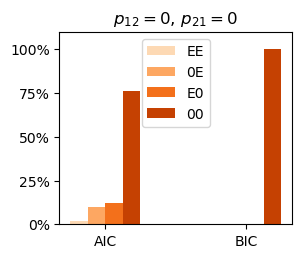

AIC choice [29. 13. 43. 15.]
BIC choice [ 3.  9. 20. 68.]


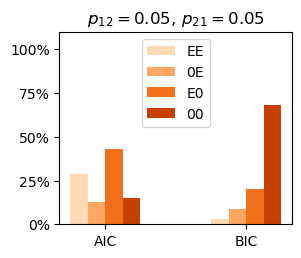

AIC choice [69.  2. 28.  1.]
BIC choice [12.  8. 60. 20.]


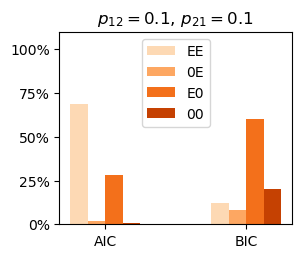

AIC choice [96.  0.  4.  0.]
BIC choice [74.  1. 23.  2.]


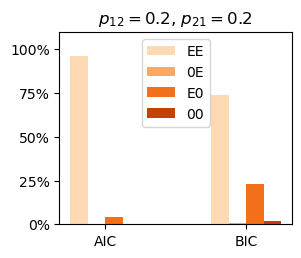

In [16]:
#Figure 5 panels B-D
for fold_number in range(4):
    probs = ['0', '0.05', '0.1', '0.2'][fold_number]
    spec_fold_nrs = [[0,1,2,3], [4,5,6,7], [8,9,10,11], [12,13,14,15]][fold_number]
    
    #AIC = 2k - 2log(maxL)
    AICs = [[], [], [], []]

    

    for fold_ind in range(4):
        fold_name = list_of_folders[spec_fold_nrs[fold_ind]]
        AICs[fold_ind] = [2*n_param[fold_name]-log_pi_best[fold_name][seed]
                          for seed in range(100)]

    AICs = np.array(AICs)

    AIC_choice = np.zeros(4)
    for seed in range(100):
        AIC_choice[np.argmin([AICs[i, seed] for i in range(4)])] += 0.01


    #{BIC} = k log(n) - 2log(maxL))
    BICs = [[], [], [], []]

    for fold_ind in range(4):
        fold_name = list_of_folders[spec_fold_nrs[fold_ind]]
        BICs[fold_ind] = [n_param[fold_name]*np.log(N)-log_pi_best[fold_name][seed]
                           for seed in range(100)]

    BICs = np.array(BICs)

    BICs = [[], [], [], []]

    for fold_ind in range(4):
        fold_name = list_of_folders[spec_fold_nrs[fold_ind]]
        BICs[fold_ind] = [n_param[fold_name]*np.log(N)-log_pi_best[fold_name][seed]
                           for seed in range(100)]

    BICs = np.array(BICs)

    BIC_choice = np.zeros(4)
    for seed in range(100):
        BIC_choice[np.argmin([BICs[i, seed] for i in range(4)])] += 0.01


    print('AIC choice', 100*AIC_choice)
    print('BIC choice', 100*BIC_choice)

    colors_list = mpl.colormaps['Oranges'](np.linspace(0, 1, 6))[1:5]
    positions = [-0.3,-0.1,0.1,0.3]
    model_names = ['EE', '0E', 'E0', '00']

    plt.figure(figsize=(3,2.5))

    for i in range(4):
        j = positions[i]
        plt.bar(j, AIC_choice[i]*100, width=0.2,
                label=model_names[i], color=colors_list[i])
        
    plt.legend(loc='upper center')
    
    for i in range(4):
        j = positions[i]
        plt.bar(j+1.6, BIC_choice[i]*100, width=0.2,
                label=model_names[i], color=colors_list[i])

    plt.xticks([0,1.6], ['AIC', 'BIC'])
    plt.yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
    plt.ylim([0, 110])
    plt.title(r'$p_{12}=$'+probs+', $p_{21}=$'+probs)
    plt.savefig("frequency_model_selected_with_criteria_"+probs+".png", format="png", dpi=1200,
                bbox_inches="tight")
    plt.show()

In [ ]:
#Creating all the empty dictionaries
theta_all = {'pij0':[[] for _ in range(100)], 'pij0_p120':[[] for _ in range(100)],
             'pij0_p210':[[] for _ in range(100)], 'pij_set_to0':[[] for _ in range(100)],
             'pij0_0.05':[[] for _ in range(100)], 'pij0_p120_0.05':[[] for _ in range(100)],
             'pij0_p210_0.05':[[] for _ in range(100)], 'pij_set_to0_0.05':[[] for _ in range(100)],
             'pij0_0.1':[[] for _ in range(100)], 'pij0_p120_0.1':[[] for _ in range(100)],
             'pij0_p210_0.1':[[] for _ in range(100)], 'pij_set_to0_0.1':[[] for _ in range(100)],
             'pij0_0.2':[[] for _ in range(100)], 'pij0_p120_0.2':[[] for _ in range(100)],
             'pij0_p210_0.2':[[] for _ in range(100)], 'pij_set_to0_0.2':[[] for _ in range(100)]}
theta_best = {'pij0':[None for _ in range(100)], 'pij0_p120':[None for _ in range(100)],
              'pij0_p210':[None for _ in range(100)], 'pij_set_to0':[None for _ in range(100)],
              'pij0_0.05':[None for _ in range(100)], 'pij0_p120_0.05':[None for _ in range(100)],
              'pij0_p210_0.05':[None for _ in range(100)], 'pij_set_to0_0.05':[None for _ in range(100)],
              'pij0_0.1':[None for _ in range(100)], 'pij0_p120_0.1':[None for _ in range(100)],
              'pij0_p210_0.1':[None for _ in range(100)], 'pij_set_to0_0.1':[None for _ in range(100)],
              'pij0_0.2':[None for _ in range(100)], 'pij0_p120_0.2':[None for _ in range(100)],
              'pij0_p210_0.2':[None for _ in range(100)], 'pij_set_to0_0.2':[None for _ in range(100)]}

#importing the data - this does take a while
for fold_name in list_of_folders_ready:
    print("Importing theta - folder", fold_name, "seed")
    for seed in range(100): #to generate the next figures it is enough to do for seed in range(1):
        print(str(seed))
        for param in parameter_names[fold_name]:
            theta_all[fold_name][seed] += [np.array(pd.read_csv("RESULTS_3_"+fold_name+"/MCMC, seed "+str(seed)+", parameter "+param+", burnin=10000, n_after_burnin=10000", index_col=0)).flatten()]
        theta_all[fold_name][seed] = np.array(theta_all[fold_name][seed])
        theta_best[fold_name][seed] = theta_all[fold_name][seed][:, np.argmax(log_pi[fold_name][seed])]

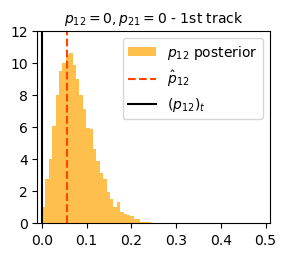

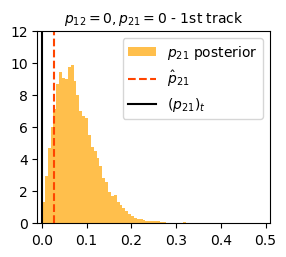

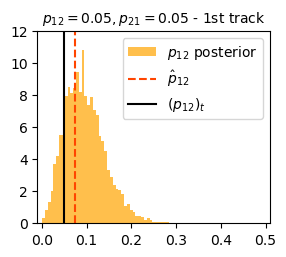

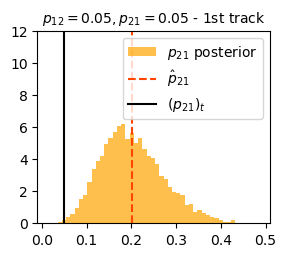

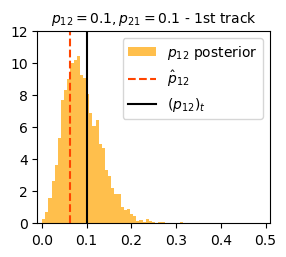

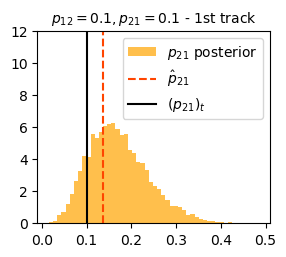

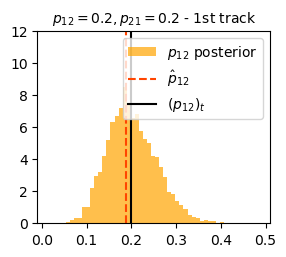

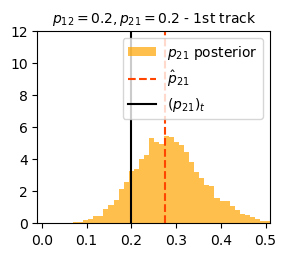

In [45]:
#Figure 5 panels F-M
for ind in range(4):
    fold_name = ['pij0', 'pij0_0.05', 'pij0_0.1', 'pij0_0.2'][ind]

    title_name = [r'$p_{12}=0, p_{21}=0$ - 1st track',
                  r'$p_{12}=0.05, p_{21}=0.05$ - 1st track',
                  r'$p_{12}=0.1, p_{21}=0.1$ - 1st track',
                  r'$p_{12}=0.2, p_{21}=0.2$ - 1st track'][ind]
    
    val = [0, 0.05, 0.1, 0.2][ind]
    
    plt.figure(figsize=(3,2.5))
    plt.hist(theta_all[fold_name][0][5,:], bins=50, alpha=0.7,
             color='orange', density=True, label=r'$p_{12}$ posterior')
    plt.axvline(theta_best[fold_name][0][5], linestyle='--',
                color='orangered', label=r'$\hat p_{12}$')
    plt.axvline(val, color='black', label=r'$(p_{12})_t$')
    plt.xlim([-0.01,0.51])
    plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.yticks(np.arange(0,14,2))
    plt.title(title_name, size=10)
    plt.legend()
    plt.savefig("p12_for_seed_0_"+fold_name+".png", format="png", dpi=1200,
                bbox_inches="tight")
    plt.show()
    
    
    plt.figure(figsize=(3,2.5))
    plt.hist(theta_all[fold_name][0][6,:], bins=50, alpha=0.7,
             color='orange', density=True, label=r'$p_{21}$ posterior')
    plt.axvline(theta_best[fold_name][0][6], linestyle='--',
                color='orangered', label=r'$\hat p_{21}$')
    plt.axvline(val, color='black', label=r'$(p_{21})_t$')
    plt.xlim([-0.01,0.51])
    plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.yticks(np.arange(0,14,2))
    plt.title(title_name, size=10)
    plt.legend()
    plt.savefig("p21_for_seed_0_"+fold_name+".png", format="png", dpi=1200,
                bbox_inches="tight")
    plt.show()

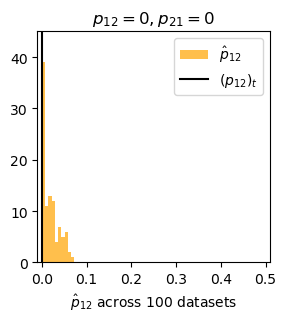

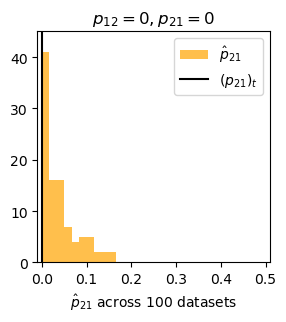

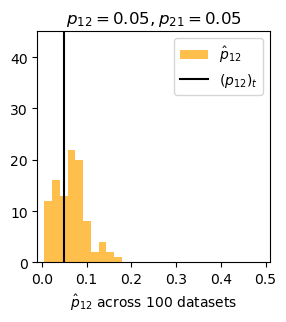

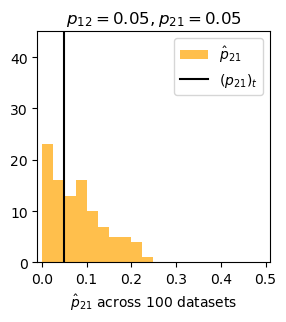

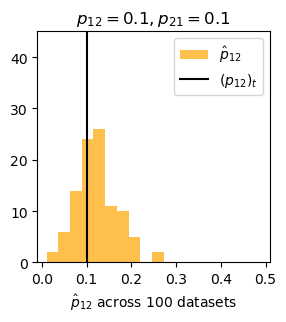

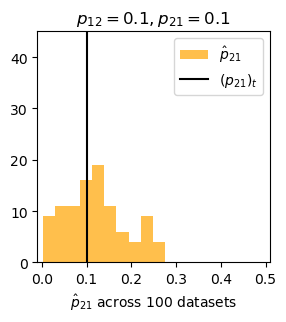

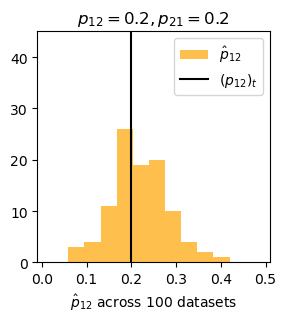

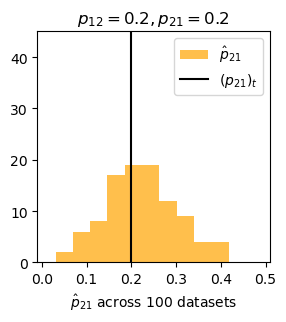

In [46]:
#Supplementary Figure S10
for ind in range(4):
    fold_name = ['pij0', 'pij0_0.05', 'pij0_0.1', 'pij0_0.2'][ind]

    title_name = [r'$p_{12}=0, p_{21}=0$', r'$p_{12}=0.05, p_{21}=0.05$',
                  r'$p_{12}=0.1, p_{21}=0.1$', r'$p_{12}=0.2, p_{21}=0.2$'][ind]
    
    val = [0, 0.05, 0.1, 0.2][ind]
    
    plt.figure(figsize=(3,3))
    plt.hist([theta_best[fold_name][seed][5]
              for seed in range(100)], bins=10, label=r'$\hat p_{12}$',
             alpha=0.7, color='orange')
    plt.axvline(val, color='black', label=r'$(p_{12})_t$')
    plt.xlabel(r'$\hat p_{12}$ across 100 datasets')
    #plt.ylabel('counts for 100 datasets')
    plt.xlim([-0.01,0.51])
    plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.yticks([0,10,20,30,40])
    plt.ylim([0,45])
    plt.title(title_name)
    plt.legend()
    plt.savefig("best_p12_for_"+fold_name+".png", format="png", dpi=1200,
                bbox_inches="tight")
    plt.show()
    
    
    plt.figure(figsize=(3,3))
    plt.hist([theta_best[fold_name][seed][6]
              for seed in range(100)], bins=10, label=r'$\hat p_{21}$',
             alpha=0.7, color='orange')
    plt.axvline(val, color='black', label=r'$(p_{21})_t$')
    plt.xlabel(r'$\hat p_{21}$ across 100 datasets')
    #plt.ylabel('counts for 100 datasets')
    plt.xlim([-0.01,0.51])
    plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
    plt.yticks([0,10,20,30,40])
    plt.ylim([0,45])
    plt.title(title_name)
    plt.legend()
    plt.savefig("best_p21_for_"+fold_name+".png", format="png", dpi=1200,
                bbox_inches="tight")
    plt.show()